In [83]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP



In [75]:
X = pd.read_pickle('../homework1/X.pkl')
y = pd.read_pickle('../homework1/y.pkl')

In [84]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
X_stan = StandardScaler().fit_transform(X)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [96]:
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_stan)

KMeans(n_clusters=9, random_state=0)

In [27]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

1    28460
6     1485
0      752
5      635
7      520
3      493
2      159
4       57
Name: labels, dtype: int64

In [97]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [15]:
sum(kmeans.labels_)

159

In [17]:
kmeans.labels_.var()

0.004859297329838416

In [34]:
kmeans.cluster_centers_[0].shape

(59,)

In [35]:
X.shape

(32561, 59)

In [98]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=9, random_state=10)
gm.fit(X_stan)

GaussianMixture(n_components=9, random_state=10)

In [99]:
pd.DataFrame(gm.fit_predict(X_stan),columns=['label']).label.value_counts()

2    11655
1     7049
5     5117
3     3148
4     2487
6     1986
0      914
8      198
7        7
Name: label, dtype: int64

In [100]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [101]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
kmeans.labels_[[0,2]]

array([5, 5])

In [105]:
income['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [113]:
pd.DataFrame(kmeans.labels_[X['native.country_Canada']==1])[0].value_counts()

4    38
2    32
0    21
5    14
7     8
3     6
1     2
Name: 0, dtype: int64

In [115]:
pd.DataFrame(kmeans.labels_[X['native.country_other']==1])[0].value_counts()

4    631
2    584
0    419
5    100
3     95
1     84
7     59
Name: 0, dtype: int64

In [37]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(32561, 2)

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
n_neighbors=2

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


Text(0.5,0.98,'Manifold Learning with 1000 points, 2 neighbors')

<Figure size 1080x576 with 0 Axes>

In [48]:
from sklearn import manifold, datasets

n_points = 1000
X1, color = datasets.make_s_curve(32561, random_state=0)

In [49]:
color

array([ 0.46005644,  2.028112  ,  0.968522  , ...,  1.21266926,
       -1.72622701,  3.92248014])

In [53]:
i=0
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)
#ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


(-96.01885854184566, 94.52276479184572, -96.44877498336895, 96.06880061813457)

In [52]:
X_embedded[:, 0]

array([ 13.125074,  13.12485 ,  13.125004, ...,  35.173664,  50.48359 ,
       -35.992203], dtype=float32)

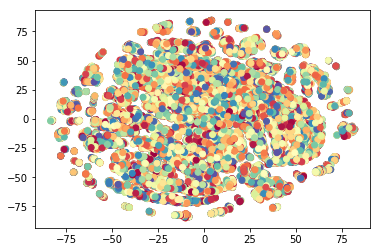

In [54]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)

In [56]:
X_embedded.shape

(32561, 2)

In [57]:
X_embedded[:10]

array([[ 13.125074, -74.85138 ],
       [ 13.12485 , -74.8513  ],
       [ 13.125004, -74.8514  ],
       [ 13.147255, -74.8633  ],
       [ 13.147282, -74.86335 ],
       [ 13.158456, -74.87092 ],
       [ 13.158326, -74.87084 ],
       [ 13.169389, -74.87893 ],
       [ 13.169538, -74.879005],
       [ 14.169823, -75.68437 ]], dtype=float32)

In [58]:
income = pd.read_csv('../homework1/adult.csv')

In [60]:
income.na

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [66]:
gm.fit_predict(X).size

32561

In [65]:
kmeans.labels_.size

32561

In [67]:
kmeans.cluster_centers_

array([[ 4.49015957e+01,  1.14428191e+01,  7.83119681e+03,
         1.40687462e-12,  4.43577128e+01,  5.18617021e-02,
         9.30851064e-02,  1.40946282e-18,  6.13031915e-01,
         6.51595745e-02,  9.04255319e-02,  5.31914894e-02,
         2.81892565e-18,  3.32446809e-02,  8.37765957e-02,
         1.32978723e-03,  7.81914894e-01,  5.31914894e-03,
         9.97340426e-02,  1.19680851e-02,  1.59574468e-02,
         8.90957447e-02,  4.39101880e-18,  1.19680851e-01,
         2.35372340e-01,  2.39361702e-02,  1.46276596e-02,
         3.19148936e-02,  1.40946282e-18,  2.39361702e-02,
         8.32667268e-17,  2.24734043e-01,  2.12765957e-02,
         1.14361702e-01,  2.26063830e-02,  4.52127660e-02,
         3.32446809e-02,  6.94148936e-01,  1.39627660e-01,
         6.64893617e-03,  2.12765957e-02,  5.71808511e-02,
         8.11170213e-02,  7.97872340e-03,  2.92553191e-02,
         6.25000000e-02,  5.31914894e-03,  8.94946809e-01,
         1.79521277e-01,  8.20478723e-01,  3.98936170e-0

In [91]:
kmeans.cluster_centers_

array([[-8.09759290e-02,  1.13616720e-01, -5.45911907e-02,
        -3.10696539e-02,  4.37958117e-02,  4.60364702e-02,
         2.50801410e-02, -1.46638105e-02,  2.58241186e-01,
        -6.18588179e-02, -2.81740534e-01,  5.74847829e-02,
        -2.07399897e-02, -2.44450198e-01,  4.33973789e-01,
        -2.65869483e-02, -9.20916156e-01,  9.04530986e-02,
         5.52330386e-01,  1.03793144e-01,  1.34223956e-01,
         1.30623178e-01,  1.63441757e-02, -9.24124749e-02,
        -9.63902247e-04, -7.31091389e-02, -2.77271700e-03,
         7.33215277e-04, -1.46638105e-02,  8.24548435e-02,
         6.21338502e-02,  1.00397221e-01, -8.29639299e-03,
        -7.85524448e-03,  5.43529014e-02, -4.37409647e-02,
        -2.44450198e-01, -8.25333347e-01,  1.70804794e+00,
        -1.75448130e-01, -4.28589866e-01, -3.44032316e-01,
        -2.24926808e-01, -9.82008699e-02, -3.81030984e-02,
         1.43335897e-02,  4.91678373e-03,  3.28205715e-02,
         3.04587093e-01, -3.04587093e-01,  8.73735220e-0

In [94]:
X_stan[0].shape

(59,)

In [68]:
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 8,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}